# Week3_授業課題_信用情報の分析

## 【問題1】コンペティション内容の把握
コンペティションのOverviewページ読み、「Home Credit Default Risk」はどのようなコンペティションか、以下の観点からレポートしてください。

1.Home Creditはどのような企業？
> 銀行口座を持たない金銭的に不利な人々が金融サービスを受けられるように、ポジティブで安全な借入経験を提供している。  

2.このコンペティションでは何を予測する？
> 顧客の返済能力  

3.それを予測することで企業が得られるメリットは何？
>- 返済能力のある顧客に対して、ポジティブな借入経験を提供できる  
>- リスクの少ない融資機会の最大化

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('application_train.csv')
display(df)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.000,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.000,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


## 【問題2】データの概観の把握
データの概観を把握するために以下のようなことを行ってください。

- .head()、.info()、describe()などを使う
- 欠損値の有無を見る
- クラスごとのデータ数をグラフに出す

それぞれ結果に対する説明や考察も行ってください。

In [3]:
display(df.head())
display(df.tail())

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [6]:
display(df.describe())

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [7]:
df.shape

(307511, 122)

In [8]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


None

- 欠損値について

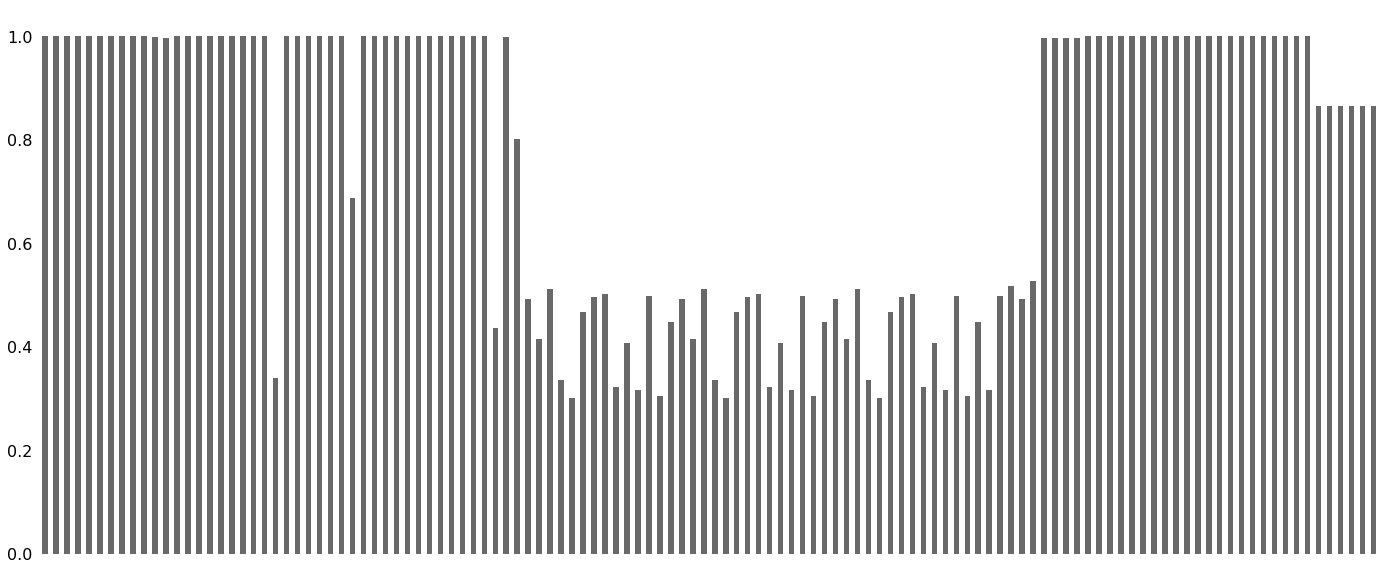

In [9]:
import missingno as msno
msno.bar(df)

In [10]:
def missing_df_check(df):
    """
    データフレームを入力すると、各特徴量の「データ,欠損個数,欠損値の割合」をデータフレームとして返す関数
    """
    missing_df = pd.DataFrame(df.count(), columns=['count'])
    missing_df['is_null'] = df.isnull().sum()
    missing_df['total'] = missing_df['count']+ missing_df['is_null']
    missing_df['missing_ratio'] = missing_df['is_null'] / missing_df['total']
    return missing_df

In [11]:
missing_df = missing_df_check(df)
display(missing_df.query("missing_ratio>0")) #欠損値の割合が0ではない特徴量の抽出

,count,is_null,total,missing_ratio
AMT_ANNUITY,307499,12,307511,0.000039
AMT_GOODS_PRICE,307233,278,307511,0.000904
NAME_TYPE_SUITE,306219,1292,307511,0.004201
OWN_CAR_AGE,104582,202929,307511,0.659908
OCCUPATION_TYPE,211120,96391,307511,0.313455
CNT_FAM_MEMBERS,307509,2,307511,0.000007
EXT_SOURCE_1,134133,173378,307511,0.563811
EXT_SOURCE_2,306851,660,307511,0.002146
EXT_SOURCE_3,246546,60965,307511,0.198253
APARTMENTS_AVG,151450,156061,307511,0.507497


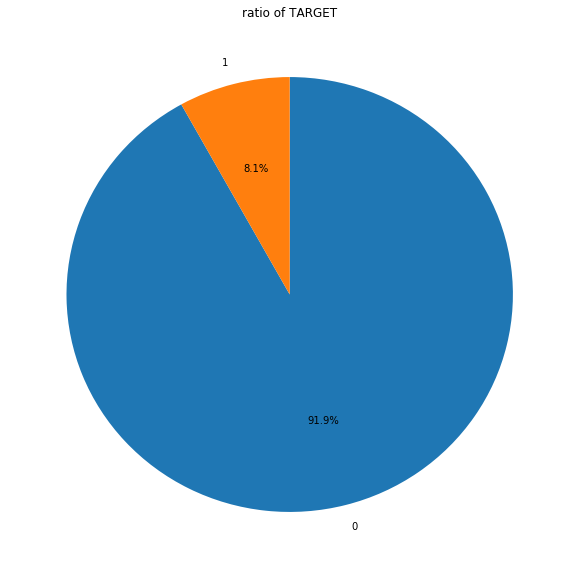

0    282686
1     24825
Name: TARGET, dtype: int64


In [12]:
# 目的変数の分布
# 横向き棒グラフの表示

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
plt.pie(df['TARGET'].value_counts(), counterclock=False, startangle=90, autopct='%1.1f%%', labels=df['TARGET'].value_counts().index)
plt.title("ratio of TARGET")
plt.show()
print(df['TARGET'].value_counts())

### ＜まとめ＞
- 元のデータセットは、307511のサンプル数、122個の変数を持っている
- 目的変数は「TARGET」で0（融資可）か1（融資不可）かの2値分類で、0：91.9％、1：8.1％
- 欠損値のある特徴量は、67/122個

## 【問題3】課題設定  
データの概観を見たことを元に、自分なりの課題・疑問を複数設定してください。
>課題1：TARGETが0と1の差はどの特徴量が大きく関係しているのか見出す  
課題2：課題1で見出した特徴量について掘り下げてみる

## 【問題4】データ探索  
問題3で設定した課題・疑問を解決するためにデータ探索を進めます。考察を伴う表やグラフを 15個以上 作成してください。


探索過程で新しい疑問点が生まれた場合は、問題3の回答に加えていってください。



### 課題1：TARGETが0と1の差はどの特徴量が大きく関係しているのか見出す  
TARGETが0か1かで、データフレームを2つに分け、数値データの特徴量の平均値を比較してみる。  
①データフレームのサンプル数の差が大きい  
②平均値なので過信できない  
という2点の懸念があり、横暴なところもあるがひとまずやってみる。

In [13]:
#数値の特徴量のみのデータフレームを作成し、欠損値のある特徴量は削除　
df_num = df.select_dtypes(exclude="object").dropna(how='any', axis=1)
display(df_num)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,0,202500.000,406597.5,0.018801,-9461,-637,-3648.0,-2120,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,0,270000.000,1293502.5,0.003541,-16765,-1188,-1186.0,-291,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,0,67500.000,135000.0,0.010032,-19046,-225,-4260.0,-2531,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,135000.000,312682.5,0.008019,-19005,-3039,-9833.0,-2437,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,121500.000,513000.0,0.028663,-19932,-3038,-4311.0,-3458,...,0,0,0,0,0,0,0,0,0,0
5,100008,0,0,99000.000,490495.5,0.035792,-16941,-1588,-4970.0,-477,...,0,0,0,0,0,0,0,0,0,0
6,100009,0,1,171000.000,1560726.0,0.035792,-13778,-3130,-1213.0,-619,...,0,0,1,0,0,0,0,0,0,0
7,100010,0,0,360000.000,1530000.0,0.003122,-18850,-449,-4597.0,-2379,...,0,0,0,0,0,0,0,0,0,0
8,100011,0,0,112500.000,1019610.0,0.018634,-20099,365243,-7427.0,-3514,...,0,0,0,0,0,0,0,0,0,0
9,100012,0,0,135000.000,405000.0,0.019689,-14469,-2019,-14437.0,-3992,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df_num.shape

(307511, 45)

In [15]:
#データフレームをTARGETが0か1で2つに分ける
df0 = df_num.query("TARGET==0")
display(df0)
print("-----------------------------------------------------")
df1 = df_num.query("TARGET==1")
display(df1)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
1,100003,0,0,270000.000,1293502.5,0.003541,-16765,-1188,-1186.0,-291,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,0,67500.000,135000.0,0.010032,-19046,-225,-4260.0,-2531,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,135000.000,312682.5,0.008019,-19005,-3039,-9833.0,-2437,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,121500.000,513000.0,0.028663,-19932,-3038,-4311.0,-3458,...,0,0,0,0,0,0,0,0,0,0
5,100008,0,0,99000.000,490495.5,0.035792,-16941,-1588,-4970.0,-477,...,0,0,0,0,0,0,0,0,0,0
6,100009,0,1,171000.000,1560726.0,0.035792,-13778,-3130,-1213.0,-619,...,0,0,1,0,0,0,0,0,0,0
7,100010,0,0,360000.000,1530000.0,0.003122,-18850,-449,-4597.0,-2379,...,0,0,0,0,0,0,0,0,0,0
8,100011,0,0,112500.000,1019610.0,0.018634,-20099,365243,-7427.0,-3514,...,0,0,0,0,0,0,0,0,0,0
9,100012,0,0,135000.000,405000.0,0.019689,-14469,-2019,-14437.0,-3992,...,0,0,0,0,0,0,0,0,0,0
10,100014,0,1,112500.000,652500.0,0.022800,-10197,-679,-4427.0,-738,...,0,0,0,0,0,0,0,0,0,0


-----------------------------------------------------


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,0,202500.0,406597.5,0.018801,-9461,-637,-3648.0,-2120,...,0,0,0,0,0,0,0,0,0,0
26,100031,1,0,112500.0,979992.0,0.018029,-18724,-2628,-6573.0,-1827,...,0,0,0,0,1,0,0,0,0,0
40,100047,1,0,202500.0,1193580.0,0.025164,-17482,-1262,-1182.0,-1029,...,0,0,0,0,0,0,0,0,0,0
42,100049,1,0,135000.0,288873.0,0.007305,-13384,-3597,-45.0,-4409,...,0,0,0,0,0,0,0,0,0,0
81,100096,1,0,81000.0,252000.0,0.028663,-24794,365243,-5391.0,-4199,...,0,0,0,0,0,0,0,0,0,0
94,100112,1,0,315000.0,953460.0,0.030755,-10199,-2015,-4802.0,-1038,...,0,0,0,0,0,0,0,0,0,0
110,100130,1,1,157500.0,723996.0,0.007274,-10526,-267,-387.0,-3190,...,0,0,0,0,0,0,0,0,0,0
138,100160,1,0,292500.0,675000.0,0.035792,-16667,-200,-5239.0,-114,...,0,0,0,0,0,0,0,0,0,0
154,100181,1,0,157500.0,245619.0,0.022625,-17538,-7676,-774.0,-1082,...,0,0,0,0,0,0,0,0,0,0
163,100192,1,0,111915.0,225000.0,0.018801,-7989,-150,-2570.0,-646,...,0,0,0,0,0,0,0,0,0,0


In [16]:
df0.shape

(282686, 45)

In [17]:
df1.shape

(24825, 45)

In [18]:
#各特徴量の平均値を出して、TARGETが0と1において差の大きい特徴量を見つける
mean_df = pd.DataFrame(df0.mean(), columns=["TARGET=0"])
mean_df["TARGET=1"] = df1.mean()
mean_df["difference"] = mean_df["TARGET=0"] - mean_df["TARGET=1"]
display(mean_df)

,TARGET=0,TARGET=1,difference
SK_ID_CURR,278244.744536,277449.167936,795.576601
TARGET,0.000000,1.000000,-1.000000
CNT_CHILDREN,0.412946,0.463807,-0.050861
AMT_INCOME_TOTAL,169077.722266,165611.760906,3465.961359
AMT_CREDIT,602648.282002,557778.527674,44869.754328
REGION_POPULATION_RELATIVE,0.021021,0.019131,0.001890
DAYS_BIRTH,-16138.176397,-14884.828077,-1253.348321
DAYS_EMPLOYED,65696.146123,42394.675448,23301.470675
DAYS_REGISTRATION,-5029.941065,-4487.127009,-542.814056
DAYS_ID_PUBLISH,-3017.219788,-2732.099617,-285.120171


In [19]:
display(mean_df.query("abs(difference) >1.1")) #平均値の差の絶対値が1.1以上の特徴量を抽出

,TARGET=0,TARGET=1,difference
SK_ID_CURR,278244.744536,277449.167936,795.576601
AMT_INCOME_TOTAL,169077.722266,165611.760906,3465.961359
AMT_CREDIT,602648.282002,557778.527674,44869.754328
DAYS_BIRTH,-16138.176397,-14884.828077,-1253.348321
DAYS_EMPLOYED,65696.146123,42394.675448,23301.470675
DAYS_REGISTRATION,-5029.941065,-4487.127009,-542.814056
DAYS_ID_PUBLISH,-3017.219788,-2732.099617,-285.120171


抽出した特徴量の意味合いの確認
>SK_ID_CURR：サンプルのローンのID  
AMT_INCOME_TOTAL：クライアントの収入  
AMT_CREDIT：ローンの与信金額  
DAYS_BIRTH：申請時の顧客の年齢（日単位）  
DAYS_EMPLOYED：申請の何日前に現在の雇用を開始したか  
DAYS_REGISTRATION：申請の何日前にクライアントが登録を変更したか  
DAYS_ID_PUBLISH：申請の何日前に、クライアントが本人確認書類を変更したか  

In [20]:
#どんな数値データかざっくりと確認
df.loc[:, ['SK_ID_CURR', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']].head()

,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
0,100002,202500.0,406597.5,-9461,-637,-3648.0,-2120
1,100003,270000.0,1293502.5,-16765,-1188,-1186.0,-291
2,100004,67500.0,135000.0,-19046,-225,-4260.0,-2531
3,100006,135000.0,312682.5,-19005,-3039,-9833.0,-2437
4,100007,121500.0,513000.0,-19932,-3038,-4311.0,-3458


In [21]:
#「DAYS_EMPLOYED」の値について、平均値だとプラスで出ているにも関わらず、head()でみた値がマイナスとなっており、
#違和感を感じるので調査してみる
display(df["DAYS_EMPLOYED"])

0           -637
1          -1188
2           -225
3          -3039
4          -3038
5          -1588
6          -3130
7           -449
8         365243
9          -2019
10          -679
11        365243
12         -2717
13         -3028
14          -203
15         -1157
16         -1317
17          -191
18         -7804
19         -2038
20         -4286
21         -1652
22         -4306
23        365243
24          -746
25         -3494
26         -2628
27         -1234
28         -1796
29         -1010
           ...  
307481     -3147
307482      -226
307483    365243
307484      -328
307485      -670
307486     -1185
307487    365243
307488     -1218
307489      -286
307490     -1928
307491     -1953
307492     -1618
307493     -2306
307494     -6573
307495     -7438
307496     -2178
307497     -1222
307498     -3689
307499     -8694
307500     -5326
307501     -1046
307502     -8736
307503      -399
307504     -7258
307505    365243
307506      -236
307507    365243
307508     -79

「DAYS_EMPLOYED」の値はほとんどがマイナスで、プラスの場合は「365243」となっている。  
恐らく働けない人だと予測するが、理解できない特徴量を使うことには抵抗がある。

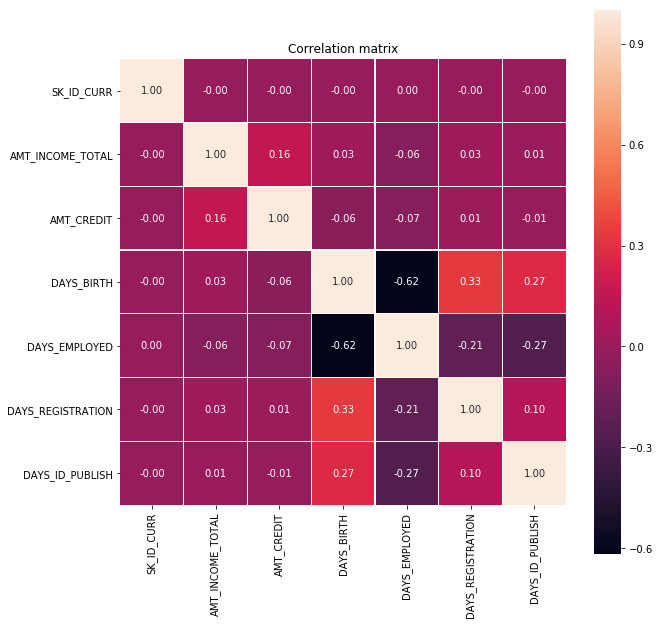

In [22]:
#相関係数行列をみてみる
fig = plt.figure(figsize=(10, 10))
plt.title('Correlation matrix')

sns.heatmap(df.loc[:, ['SK_ID_CURR', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']].corr(), \
            linewidths=0.1, linecolor="white", square=True, annot=True, fmt='.2f', annot_kws={'size': 10})
plt.show()

特に相関の高い特徴量はない。  
AMT_INCOME_TOTALとAMT_CREDITには相関があるかと思っていたがそうでもないようだ。

#### 結果や考察  
差のあった各特徴量について、
- SK_ID_CURR はただのIDなので、差があったとはいえ、あまり意味を持たない特徴量だと予測する。
- AMT_INCOME_TOTALより、0の顧客の方が収入が多いと予測する。
- AMT_CREDITより、0の顧客の方がローンの与信金額が多いことがわかる。一番0〜1間で差の大きかった特徴量。当たり前ではある。
- DAYS_BIRTHより、0の顧客の方が平均年齢が高いと予測できる。
- DAYS_EMPLOYEDは、2つ前のCodeセルで考察しているように、あまり参考にできるデータではないと判断する。365243のデータを除いて比較してみたら何かわかる可能性はある。
- DAYS_REGISTRATIONとDAYS_ID_PUBLISHは似たような特徴量で、登録情報を変更していない期間が長い程、0に該当しやすいと予測できる。  

### 課題2：課題1で見出した特徴量について掘り下げてみる  
>~~SK_ID_CURR：サンプルのローンのID~~  
AMT_INCOME_TOTAL：クライアントの収入  
AMT_CREDIT：ローンの与信金額  
DAYS_BIRTH：申請時の顧客の年齢（日単位）  
DAYS_EMPLOYED：申請の何日前に現在の雇用を開始したか  
DAYS_REGISTRATION：申請の何日前にクライアントが登録を変更したか  
DAYS_ID_PUBLISH：申請の何日前に、クライアントが本人確認書類を変更したか  

- AMT_INCOME_TOTAL：クライアントの収入

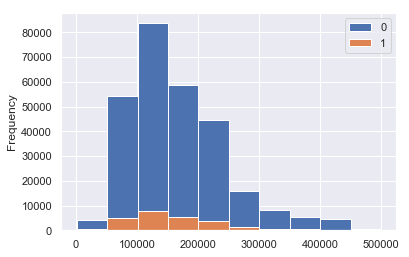

In [123]:
#TARGETが0と1の収入のヒストグラムを重ねてみる

df0["AMT_INCOME_TOTAL"].plot.hist(range=(1000, 500000), label=0)
df1["AMT_INCOME_TOTAL"].plot.hist(range=(1000, 500000), label=1)
plt.legend()

同じような形の分布をしているように見える。  
サンプル数が大幅に違うので正規化をして可視化してみる。

/Users/itonaoki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/itonaoki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


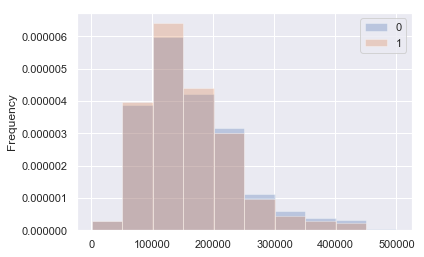

In [125]:
#TARGETが0と1の収入のヒストグラムを重ねてみる（正規化したもの）

df0["AMT_INCOME_TOTAL"].plot.hist(range=(1000, 500000), normed=True, alpha=0.3, label=0)
df1["AMT_INCOME_TOTAL"].plot.hist(range=(1000, 500000), normed=True, alpha=0.3, label=1)
plt.legend()

正規化して確認してみたところ、やはり似たような分布になっている。  
よって、**「AMT_INCOME_TOTAL：クライアントの収入」が0,1の2値分類に大きく影響していない**ということになる。  
また、課題1でしたように**平均値をとって比較するというのはあまり良い分析の仕方ではない**のかもしれない。  

In [111]:
#少し気になったので、データの値を標準化してから平均値をとってみようとしたが、
#その前に標準化がおかしい？平均値が0にならない。

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
income0_scaler = scaler.fit_transform(df0["AMT_INCOME_TOTAL"].values.reshape(-1, 1))

print(income0_scaler.mean())

3.434501864763734e-16


少し気になったので、データの値を標準化してから平均値をとってみようとしたが、標準化がおかしい？平均値が0にならない。

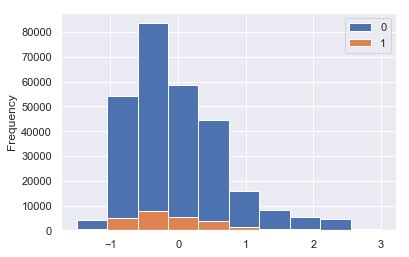

In [119]:
#参考（標準化したデータの可視化。何を意味しているのかよくわからないがとりあえず・・・。）

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
income0_scaler = scaler.fit(df0["AMT_INCOME_TOTAL"].values.reshape(-1, 1))

income0_scaler = scaler.transform(df0["AMT_INCOME_TOTAL"].values.reshape(-1, 1))
income1_scaler = scaler.transform(df1["AMT_INCOME_TOTAL"].values.reshape(-1, 1))

income0_scaler_df = pd.DataFrame(income0_scaler)
income1_scaler_df = pd.DataFrame(income1_scaler)

income0_scaler_df.loc[:, 0].plot.hist(range=(-1.5, 3), label=0)
income1_scaler_df.loc[:, 0].plot.hist(range=(-1.5, 3), label=1)
plt.legend()

***

- AMT_CREDIT：ローンの与信金額

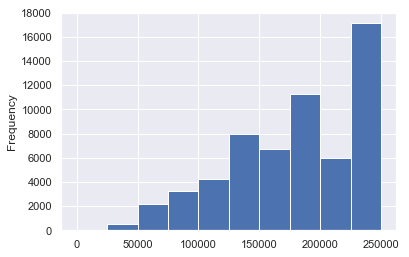

In [133]:
#全サンプル数でみた与信金額のヒストグラム
df["AMT_CREDIT"].plot.hist(range=(0, 250000))

/Users/itonaoki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/itonaoki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


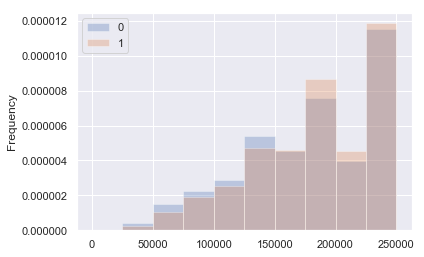

In [129]:
#TARGETが0と1の与信金額のヒストグラムを重ねてみる（正規化したもの）
df0["AMT_CREDIT"].plot.hist(range=(0, 250000), normed=True, alpha=0.3, label=0)
df1["AMT_CREDIT"].plot.hist(range=(0, 250000), normed=True, alpha=0.3, label=1)
plt.legend()

特に0と1の分布に差はない。

- DAYS_BIRTH：申請時の顧客の年齢（日単位）

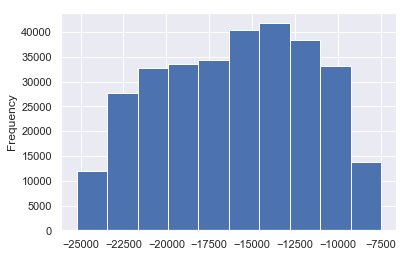

In [134]:
#全サンプル数でみた申請時の顧客の年齢のヒストグラム
df["DAYS_BIRTH"].plot.hist()

/Users/itonaoki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/itonaoki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


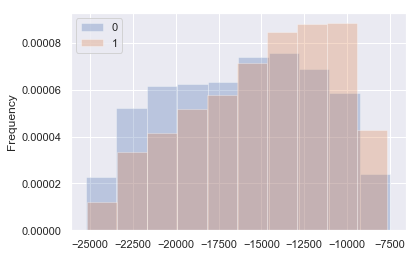

In [135]:
#0と1での比較
df0["DAYS_BIRTH"].plot.hist(normed=True, alpha=0.3, label=0)
df1["DAYS_BIRTH"].plot.hist(normed=True, alpha=0.3, label=1)
plt.legend()

1のサンプルの方が、申請時の年齢が若い人が多い。

***

- DAYS_EMPLOYED：申請の何日前に現在の雇用を開始したか

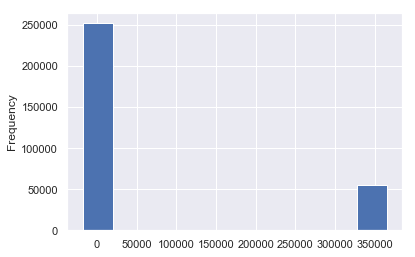

In [143]:
#全サンプル数でみた就業日数のヒストグラム
df["DAYS_EMPLOYED"].plot.hist()

課題1で、ほとんどがマイナスの値で、プラスの場合は「365243」となっていることは確認済

([<matplotlib.axis.XTick at 0x7fa1f84a6e10>,
 <a list of 5 Text xticklabel objects>)

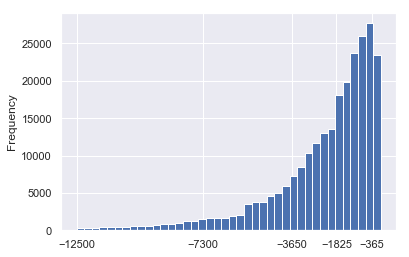

In [164]:
#365243を除いて可視化
df["DAYS_EMPLOYED"][df["DAYS_EMPLOYED"]<365243].plot.hist(range=(-12500, -0), bins=40)
plt.xticks([-365, -1825, -3650, -7300, -12500]) 

申請時点での就業日数は1〜2年前後が一番多い。

***

- DAYS_REGISTRATION：申請の何日前にクライアントが登録を変更したか

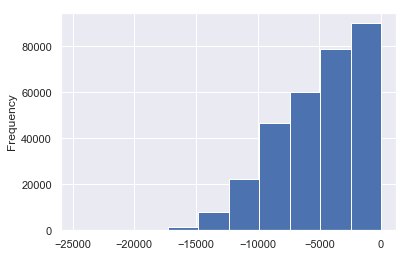

In [166]:
#全サンプル数でみた　DAYS_REGISTRATION　のヒストグラム
df["DAYS_REGISTRATION"].plot.hist()

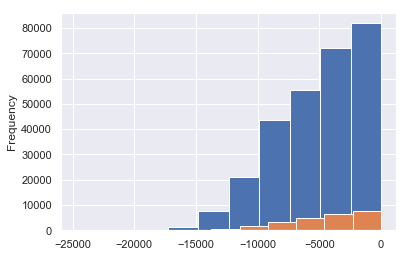

In [169]:
df0["DAYS_REGISTRATION"].plot.hist()
df1["DAYS_REGISTRATION"].plot.hist()

有用な情報は特になさそう

***

- DAYS_ID_PUBLISH：申請の何日前に、クライアントが本人確認書類を変更したか

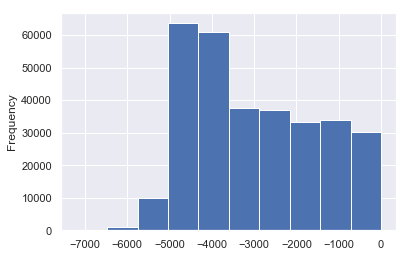

In [170]:
#全サンプル数でみた　DAYS_DAYS_ID_PUBLISH　のヒストグラム
df["DAYS_ID_PUBLISH"].plot.hist()

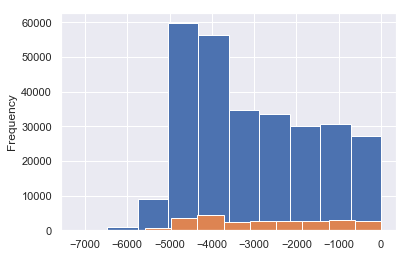

In [171]:
df0["DAYS_ID_PUBLISH"].plot.hist()
df1["DAYS_ID_PUBLISH"].plot.hist()

有用な情報は特になさそう

***

#### 結果や考察  
課題1のやり方で、0か1かを分ける差となっている特徴量を見出せるかと考えていたが、実際に課題2で1つ1つ確認していくと、予測していた物とは違う結果になっていることが多かった。  
二値分類で、クラスの差を見つけたい場合に「平均値をとって比較する」という方法は安易すぎるのかもしれない。  
EDAの難しさを素人なりに感じたのと同時に、この工程でのセンスが分析者としての地力になって来るのではないかと感じた。  
標準化や正規化等の使い方が曖昧なところがあるので、今後の課題の中で理解を深めていきたい、